In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv("Traffic_Crashes_uptoincluding_20250930.csv")
type(df['CRASH_DATE'])

FileNotFoundError: [Errno 2] No such file or directory: 'Traffic_Crashes_uptoincluding_20250930.csv'

In [ ]:
type(df['CRASH_DATE'][0])

str

In [22]:
import pandas as pd

df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce', infer_datetime_format=True)
df = df.dropna(subset=['CRASH_DATE'])

# --- 2) Year column ---
df['year'] = df['CRASH_DATE'].dt.year
# Define year ranges
periods = {
    '2015–2017': (2015, 2017),
    '2023–2025': (2023, 2025)
}

# --- Summaries for each window ---
summary_list = []

for label, (start, end) in periods.items():
    df_period = df[(df['year'] >= start) & (df['year'] <= end)]
    exclude = ['UNABLE TO DETERMINE', 'NOT APPLICABLE']
    df_period = df_period[~df_period['PRIM_CONTRIBUTORY_CAUSE'].isin(exclude)]
    total = len(df_period)
    top_causes = (
        df_period['PRIM_CONTRIBUTORY_CAUSE']
        .value_counts()
        .head(10)
        .rename_axis('PRIM_CONTRIBUTORY_CAUSE')
        .reset_index(name='count')
    )
    top_causes['percent'] = (top_causes['count'] / total * 100).round(2)
    top_causes['period'] = label
    summary_list.append(top_causes)

summary = pd.concat(summary_list)

# then redo the pivot and change calculation
compare = (
    summary.pivot_table(
        index='PRIM_CONTRIBUTORY_CAUSE',
        columns='period',
        values='percent',
        fill_value=0
    )
    .reset_index()
)
# --- Pivot to compare side by side ---
compare = (
    summary.pivot_table(
        index='PRIM_CONTRIBUTORY_CAUSE',
        columns='period',
        values='percent',
        fill_value=0
    )
    .sort_values('2023–2025', ascending=False)
    .reset_index()
)

# Optional: compute difference
compare['Change (pp)'] = (compare['2023–2025'] - compare['2015–2017']).round(2)

compare


/var/folders/hm/jmjcvqk160s6p7r4mgmyqp4m0000gn/T/ipykernel_4157/4045660527.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce', infer_datetime_format=True)


period,PRIM_CONTRIBUTORY_CAUSE,2015–2017,2023–2025,Change (pp)
0,FAILING TO YIELD RIGHT-OF-WAY,18.83,21.58,2.75
1,FOLLOWING TOO CLOSELY,21.41,16.27,-5.14
2,IMPROPER OVERTAKING/PASSING,8.66,10.25,1.59
3,FAILING TO REDUCE SPEED TO AVOID CRASH,5.82,7.44,1.62
4,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,5.76,7.38,1.62
5,IMPROPER TURNING/NO SIGNAL,5.57,6.55,0.98
6,IMPROPER LANE USAGE,7.23,6.01,-1.22
7,IMPROPER BACKING,8.35,5.88,-2.47
8,DISREGARDING TRAFFIC SIGNALS,2.22,3.73,1.51
9,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",0.00,2.10,2.10


In [ ]:
import pandas as pd

# --- Parse and extract year ---
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce', infer_datetime_format=True)
df = df.dropna(subset=['CRASH_DATE'])
df['year'] = df['CRASH_DATE'].dt.year
df['PRIM_CONTRIBUTORY_CAUSE'] = (
    df['PRIM_CONTRIBUTORY_CAUSE'].fillna('Unknown').astype(str).str.strip()
)

# --- Define periods ---
periods = {
    '2015–2017': (2015, 2017),
    '2023–2025': (2023, 2025)
}

summary_list = []

for label, (start, end) in periods.items():
    d = df[(df['year'] >= start) & (df['year'] <= end)]
    d = d[~d['PRIM_CONTRIBUTORY_CAUSE'].isin(['UNABLE TO DETERMINE', 'NOT APPLICABLE'])]
    
    total = len(d)
    top10 = (
        d['PRIM_CONTRIBUTORY_CAUSE']
        .value_counts()
        .head(10)
        .rename_axis('PRIM_CONTRIBUTORY_CAUSE')
        .reset_index(name='count')
    )
    top10['percent'] = (top10['count'] / total * 100).round(2)
    top10['period'] = label
    summary_list.append(top10)

summary = pd.concat(summary_list, ignore_index=True)

# --- Display neatly ---
summary = summary[['period', 'PRIM_CONTRIBUTORY_CAUSE', 'count', 'percent']]
summary


/var/folders/hm/jmjcvqk160s6p7r4mgmyqp4m0000gn/T/ipykernel_4157/3640531641.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce', infer_datetime_format=True)


,period,PRIM_CONTRIBUTORY_CAUSE,count,percent
0,2015–2017,FOLLOWING TOO CLOSELY,17018,21.41
1,2015–2017,FAILING TO YIELD RIGHT-OF-WAY,14974,18.83
2,2015–2017,IMPROPER OVERTAKING/PASSING,6881,8.66
3,2015–2017,IMPROPER BACKING,6641,8.35
4,2015–2017,IMPROPER LANE USAGE,5750,7.23
5,2015–2017,FAILING TO REDUCE SPEED TO AVOID CRASH,4629,5.82
6,2015–2017,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,4580,5.76
7,2015–2017,IMPROPER TURNING/NO SIGNAL,4428,5.57
8,2015–2017,WEATHER,1978,2.49
9,2015–2017,DISREGARDING TRAFFIC SIGNALS,1764,2.22


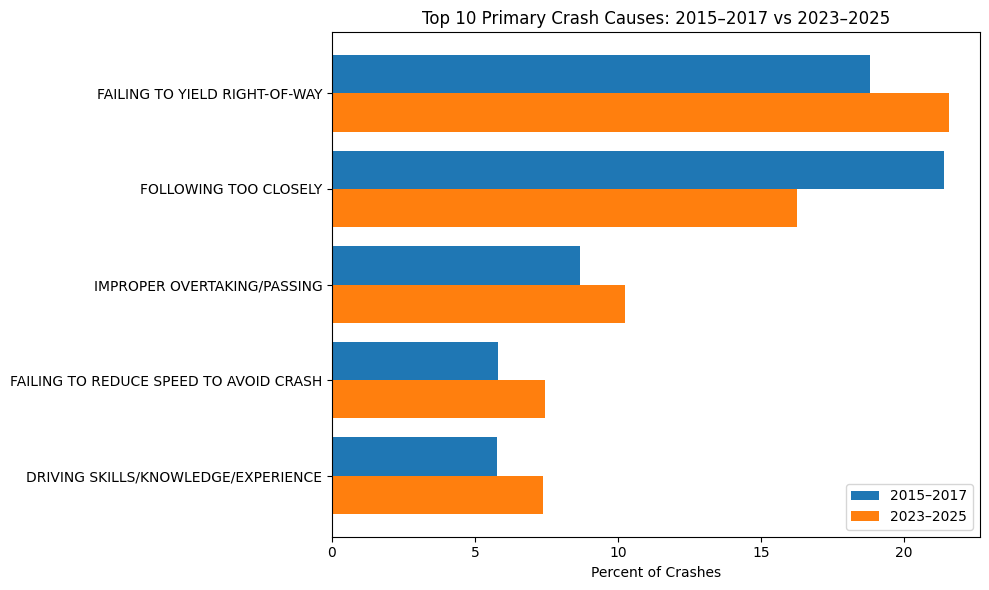

In [24]:
import matplotlib.pyplot as plt

# Pick top 10 from most recent period
top_causes = compare.nlargest(5, '2023–2025')

plt.figure(figsize=(10,6))
bar_width = 0.4
y = np.arange(len(top_causes))

plt.barh(y - bar_width/2, top_causes['2015–2017'], height=bar_width, label='2015–2017')
plt.barh(y + bar_width/2, top_causes['2023–2025'], height=bar_width, label='2023–2025')

plt.yticks(y, top_causes['PRIM_CONTRIBUTORY_CAUSE'])
plt.xlabel('Percent of Crashes')
plt.title('Top 10 Primary Crash Causes: 2015–2017 vs 2023–2025')
plt.legend()
plt.gca().invert_yaxis()  # most recent on top
plt.tight_layout()
plt.show()
